<a href="https://colab.research.google.com/github/faithfulness121/beginner-project/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'kneed'

In [2]:
cd=pd.read_csv('/content/Credit_card_dataset.csv')
cd.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [3]:
cd.columns

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')

In [4]:

# Display general information about the dataset
print(cd.info())

print(cd.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB
None
       BALANCE_FREQUENCY     PURCHASES      PAYMENTS  CREDIT_LIMIT  \
count        8950.000000   8950.000000   8950.000000   8949.000000   
mean            0.877271   1003.204834   1733.143852   4494.449450   
std             0.236904   2136.634782   2895.063757   3638.815725   
min             0.000000      0.000000      0.000000     50.000000   
25%             0.888889     39.635000    383.276166   1600.000000   
50%             1.000000    361

In [5]:
cd.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


In [6]:
#handling missing value

cd['CREDIT_LIMIT'].fillna(cd['CREDIT_LIMIT']).mean()
cd.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [7]:
#removing outliers

def remove_outliers_iqr(cd,column):

  Q1=cd[column].quantile(0.25)
  Q3=cd[column].quantile(0.75)
  IQR=Q3-Q1
  lower= Q1 - 1.5 * IQR
  upper =Q3 + 1.5 * IQR

  return cd[(cd[column]>=lower) & (cd[column]<=upper)]

cd_clean = remove_outliers_iqr(cd, 'PURCHASES')
cd_clean = remove_outliers_iqr(cd_clean, 'CREDIT_LIMIT')

In [8]:
old_shape = cd.shape
new_shape = cd_clean.shape

print("Original Shape:", old_shape)
print("New Shape:", new_shape)

Original Shape: (8950, 6)
New Shape: (7928, 6)


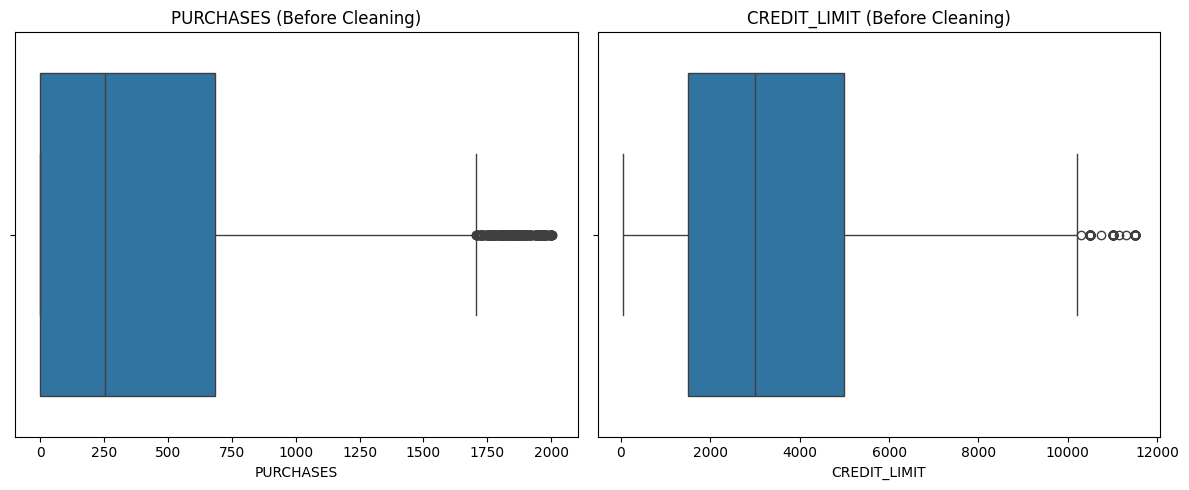

In [10]:
# Visualize outliers before removal
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=cd_clean, x='PURCHASES', ax=axes[0])
axes[0].set_title("PURCHASES (Before Cleaning)")
sns.boxplot(data=cd_clean, x='CREDIT_LIMIT', ax=axes[1])
axes[1].set_title("CREDIT_LIMIT (Before Cleaning)")
plt.tight_layout()

plt.show()


In [14]:
#filling outliers
def fill_outliers_iqr(cd, column):
    Q1 = cd[column].quantile(0.25)
    Q3 = cd[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cd[column] = cd[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return cd


cd_fill=cd.copy()
cd_fill=fill_outliers_iqr(cd_fill,'PURCHASES')
cd_fill=fill_outliers_iqr(cd_fill,'CREDIT_LIMIT')

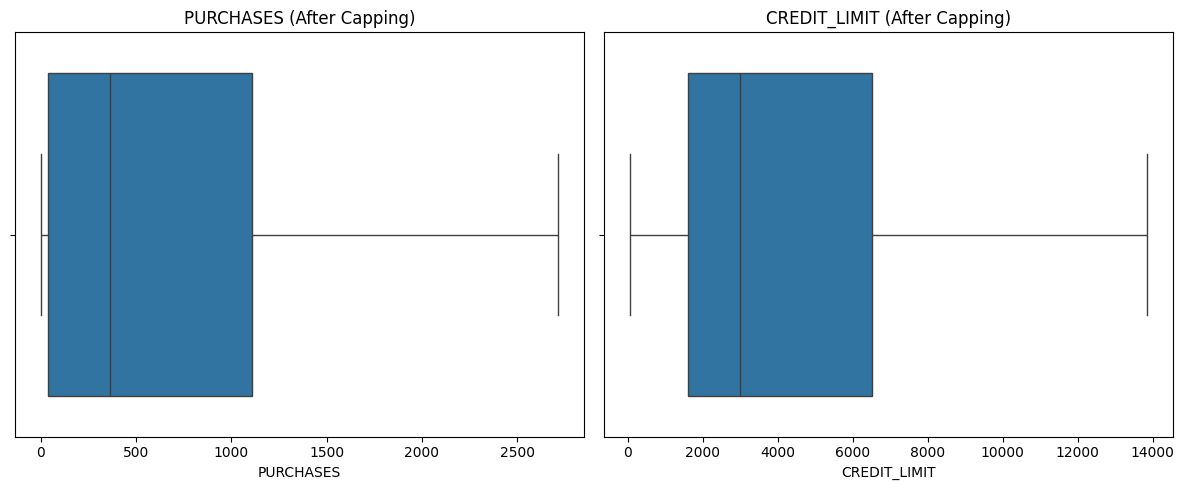

((8950, 6), None)

In [15]:
# Visualize capped values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=cd_fill, x='PURCHASES', ax=axes[0])
axes[0].set_title("PURCHASES (After Capping)")
sns.boxplot(data=cd_fill, x='CREDIT_LIMIT', ax=axes[1])
axes[1].set_title("CREDIT_LIMIT (After Capping)")
plt.tight_layout()

cd_fill.shape, plt.show()


In [19]:
#standardising data
cd_scale= cd_clean[['CREDIT_LIMIT','PURCHASES']]
scaler = StandardScaler()
cd_N =scaler.fit_transform(cd_scale)

In [26]:
cluster_model=AgglomerativeClustering(n_clusters=3, linkage='complete')
cluster_model.fit(cd_N)
#cd_scale['CUST_ID']=cluster_model.labels_

AgglomerativeClustering(n_clusters=3)

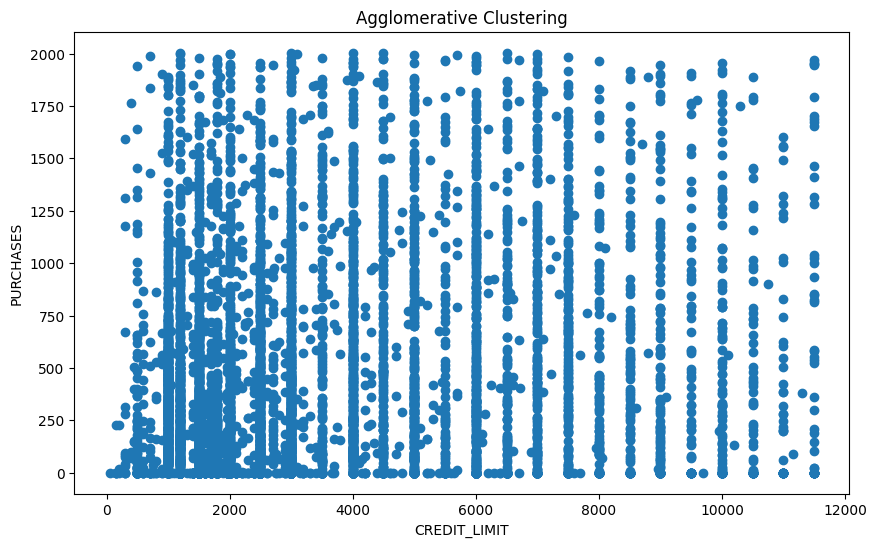

In [29]:
#virtualising data

plt.figure(figsize=(10,6))
plt.scatter(data=cd_scale,x='CREDIT_LIMIT',y='PURCHASES')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES')
plt.title('Agglomerative Clustering')
plt.show()

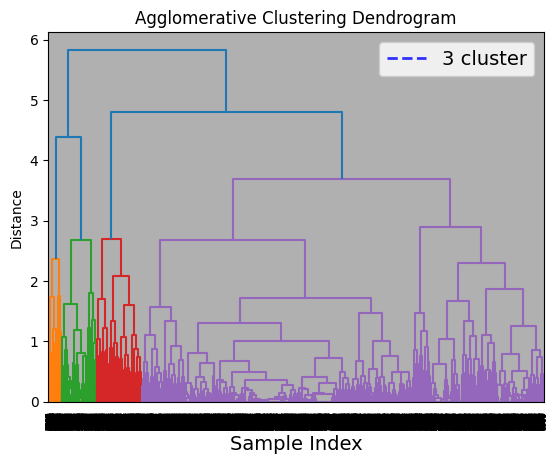

In [44]:

linked =linkage (cd_N,method='complete')

dendo= hierarchy.dendrogram(linked)
plt.axhline(40, color='red', linestyle='--',linewidth=4, alpha=0.8)
plt.axhline(y=200, color='blue', linestyle='--', linewidth=2,label='3 cluster',alpha=0.8)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Sample Index',fontsize=14)
plt.ylabel('Distance')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

Now you can re-run the cell with `KElbowVisualizer`.

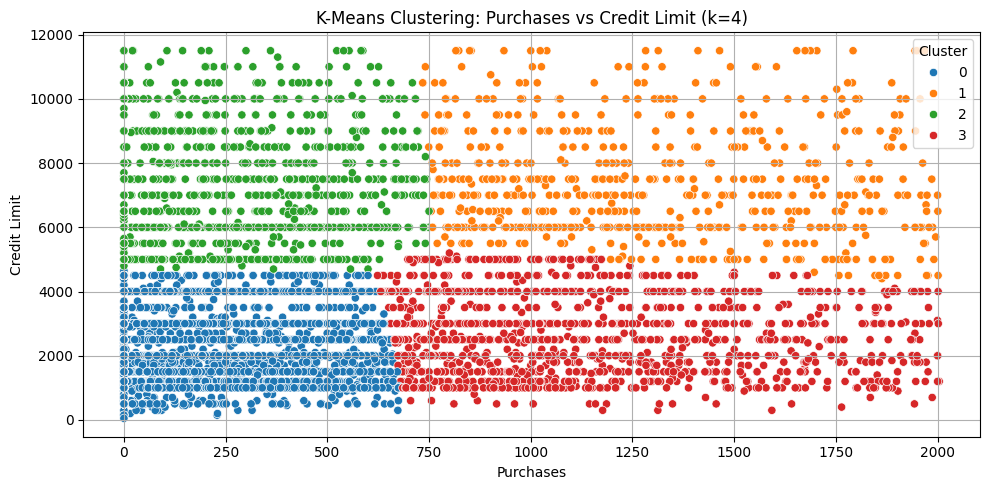

In [53]:


# Apply KMeans with an initial k value (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
cd_scale['Cluster'] = kmeans.fit_predict(cd_N)

# Plot clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(data=cd_scale, x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', palette='tab10')
plt.title('K-Means Clustering: Purchases vs Credit Limit (k=4)')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


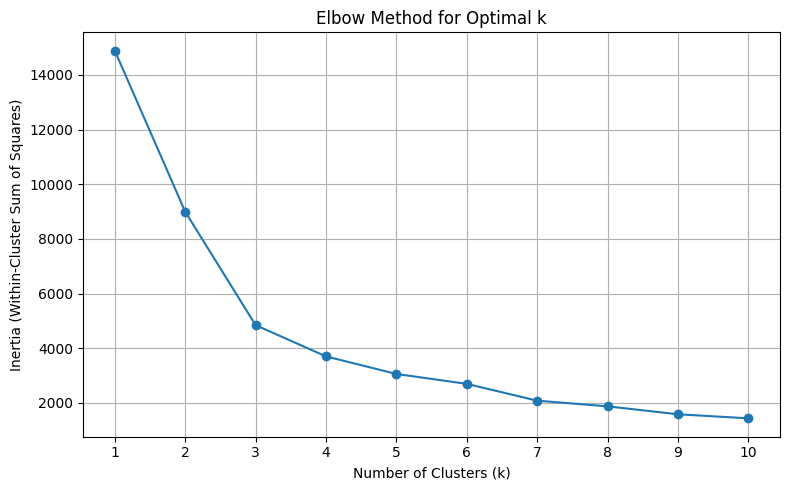

In [52]:


# Elbow method to find best k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cd_N)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()


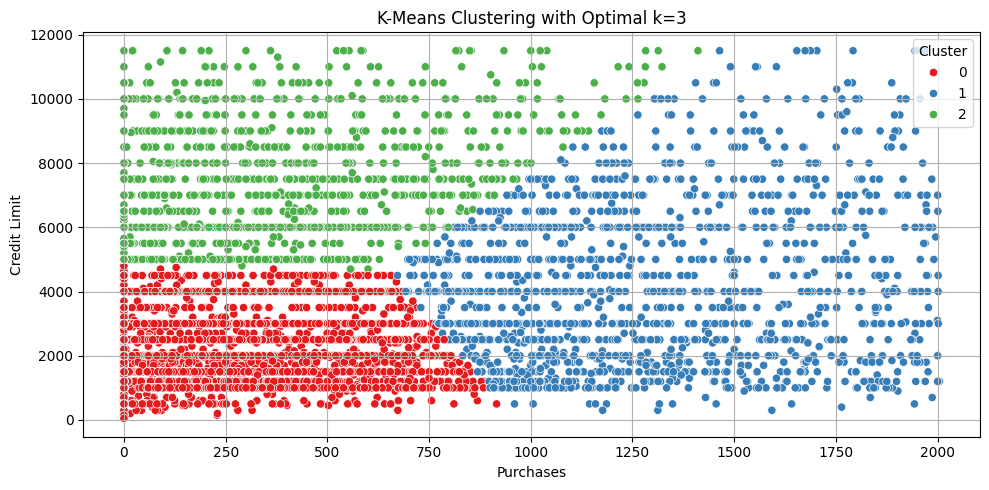

In [56]:

# Use the best k value from elbow method
best_k = 3  # ← Replace this with the k you selected
kmeans = KMeans(n_clusters=best_k, random_state=42)
cd_scale['Cluster'] = kmeans.fit_predict(cd_N)


# Plot the clustered data
plt.figure(figsize=(10, 5))
sns.scatterplot(data=cd_scale, x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', palette='Set1')
plt.title(f'K-Means Clustering with Optimal k={best_k}')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


    Cluster 0 (Low spend, low credit):

        These could be newer or risk-averse customers.

    Cluster 1 (High spend, high credit):

        Ideal for loyalty programs, personalized offers.

    Cluster 2 (Low spend, high credit):

        Customers who qualify for higher limits but spend cautiously.

